In [1]:
from __future__ import division

import scipy.integrate as integrate
import numpy as np
import math

from scipy.stats import norm

In [2]:
integrate.quad(lambda x: 1/(x**2), 1, np.inf)

(1.0, 1.1102230246251565e-14)

In [3]:
integrate.quad(lambda x: norm.pdf(x,loc=3,scale=2), -np.inf, np.inf)

(1.0000000000000007, 2.82704230849015e-09)

In [4]:
integrate.quad(lambda x: np.abs((58-x)/x)*norm.pdf(x,loc=60,scale=10), -np.inf, np.inf)

/Users/yutao/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0.13933966421479385, 8.474144230774527e-08)

In [5]:
from scipy.optimize import minimize

In [6]:
def func(x_esti, loc, scale):
    return integrate.quad(lambda x: np.abs((x_esti-x)/x)*norm.pdf(x,loc=loc,scale=scale), -np.inf, np.inf)[0]

In [25]:
def minimize_convex(loc, scale):
    b, a = loc, 0
    while b-a > 1e-2:
        x = a + (b-a)/3
        y = a + 2*(b-a)/3
        #print x, y
        if func(x, loc, scale)>func(y, loc, scale):
            a = x
        else:
            b = y
    return a

In [26]:
minimize_convex(100, 19.53)

95.95045536437036

In [27]:
minimize_convex(50, 9.765)

47.73294956619003

In [11]:
np.linspace(20,200,37)

array([  20.,   25.,   30.,   35.,   40.,   45.,   50.,   55.,   60.,
         65.,   70.,   75.,   80.,   85.,   90.,   95.,  100.,  105.,
        110.,  115.,  120.,  125.,  130.,  135.,  140.,  145.,  150.,
        155.,  160.,  165.,  170.,  175.,  180.,  185.,  190.,  195.,  200.])

In [33]:
ss = []
for i in np.linspace(20, 200, 37):
    opt = minimize_convex(i, np.sqrt(i*4.8))
    print opt
    ss.append((i, opt))

0
0.457043687457
0.591165292414
14.4703875789
12.02960354
28.6398508383
37.1843813048
40.953997016
48.4041262961
57.331844881
64.2979827606
70.1712228622
76.0361185725
78.064143681
82.8619517457
88.6367017054
94.4902914384
100.022772925
104.323178091
109.883755241
114.716632583
119.700327725
124.712062269
129.820240741
134.755459652
140.010038322
144.887233922
149.862793036
154.966634619
159.898277166
164.954790656
169.931291319
174.940081113
179.95589203
184.983391423
189.980873506
194.991730981


In [34]:
ss

[(20.0, 0),
 (25.0, 0.45704368745683188),
 (30.0, 0.59116529241350124),
 (35.0, 14.470387578938427),
 (40.0, 12.029603539956108),
 (45.0, 28.639850838313993),
 (50.0, 37.184381304809108),
 (55.0, 40.953997015971197),
 (60.0, 48.404126296116623),
 (65.0, 57.331844881012664),
 (70.0, 64.29798276063687),
 (75.0, 70.171222862196117),
 (80.0, 76.036118572480419),
 (85.0, 78.064143680978702),
 (90.0, 82.861951745703408),
 (95.0, 88.636701705379508),
 (100.0, 94.490291438393228),
 (105.0, 100.02277292525822),
 (110.0, 104.32317809087274),
 (115.0, 109.88375524088568),
 (120.0, 114.7166325832908),
 (125.0, 119.70032772545838),
 (130.0, 124.71206226923623),
 (135.0, 129.8202407405841),
 (140.0, 134.75545965207624),
 (145.0, 140.01003832177162),
 (150.0, 144.88723392180637),
 (155.0, 149.86279303560869),
 (160.0, 154.96663461891271),
 (165.0, 159.89827716565),
 (170.0, 164.95479065579534),
 (175.0, 169.93129131946753),
 (180.0, 174.94008111288272),
 (185.0, 179.95589202955344),
 (190.0, 184.9833

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

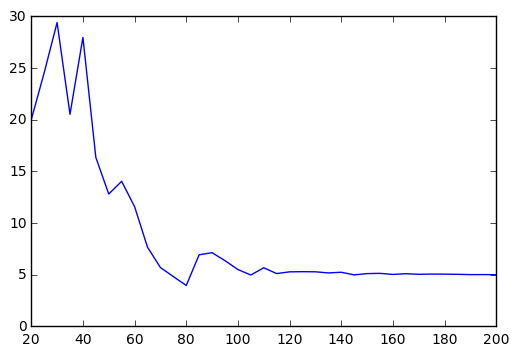

In [35]:
plt.plot([i[0] for i in ss], [i[0]-i[1] for i in ss])


In [120]:
minimize(lambda x: func(x, 60, 20), 60, tol=1e-3)

   status: 2
  success: False
     njev: 33
     nfev: 110
 hess_inv: array([[1]])
      fun: 1.147828929531372
        x: array([ 60.])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([ 0.01908605])
      nit: 0

In [86]:
?minimize

In [91]:
12*3*7

252

In [ ]:
class Solution(object):
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        for i in range(len(nums)):
            for j in range(len(nums)):
                if i + j == target:
                    return [i, j]
        

In [37]:
nums = [2, 7, 11, 15]
target = 9

In [ ]:
for i in range(len(nums)):
    for j in range(len(nums)):
        if i + j == target:
            return [i, j]